# Analyse og Forudsigelse af Ordredata
Dette projekt har til formål at analysere ordredata for at identificere mønstre og lave forudsigelser ved hjælp af forskellige dataanalyse- og maskinlæringsteknikker.


## Import af nødvendige biblioteker
Vi starter med at importere de nødvendige biblioteker, der vil blive brugt til datahåndtering, visualisering og maskinlæring.


In [1]:
# Importerer nødvendige biblioteker
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importerer biblioteker til maskinlæring og modellering
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,classification_report



# Ekstra indstillinger for bedre visning af data
from IPython.display import display


## Dataindlæsning
Her indlæses ordredata fra en CSV-fil. Det er vigtigt at sikre, at filen kan findes og læses korrekt. 


In [2]:
df = pd.read_csv(r"C:\Users\moham\Downloads\Orders.csv", skiprows=4)

In [3]:
df.head()

,Order ID,Order Date,Country,City,Branch,Lat,Lng,Customer First Name,Customer Last Name,Email,Phone Number,Category,Sub Category,Item,SalesPerson ID,Quantity,Unit Price,Discount,Status
0,1.0,1/1/2023,Syria,homs,hs01,34.7326,36.7136,lina,alrrashid,LINA.ALRRASHID@MAIL.COM,Tel: 5634962795,Tablet,Apple iPad,"iPad Pro 12.9""",N498,1.0,999.0,39.96,False
1,2.0,1/1/2023,Saudi Arabia,riyadh,rd01,24.7136,46.6753,omar,eurul,OMAR.EURUL@MAIL.COM,Tel: 5311455624,Smartphone,Samsung Galaxy,Galaxy S21 Ultra,X918,1.0,1199.0,119.90,True
2,3.0,1/1/2023,Saudi Arabia,riyadh,rd03,24.7743,46.7386,iman,iismaeil,IMAN.IISMAEIL@MAIL.COM,Tel: 5272740777,Digital Camera,Panasonic Lumix,Panasonic Lumix GH5,I036,1.0,1299.0,NaN,True
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,1/1/2023,United Arab Emirates,abu dhabi,ad01,24.4539,54.3773,ahmad,rihan,AHMAD.RIHAN@MAIL.COM,Tel: 5783343440,Tablet,Samsung Galaxy Tab,Galaxy Tab A8,E804,2.0,199.0,27.86,True


In [4]:
df.tail()

,Order ID,Order Date,Country,City,Branch,Lat,Lng,Customer First Name,Customer Last Name,Email,Phone Number,Category,Sub Category,Item,SalesPerson ID,Quantity,Unit Price,Discount,Status
19999,19996.0,1/9/2023,Morocco,casablanca,cs01,33.5731,7.5898,ahmad,iad,AHMAD.IAD@MAIL.COM,Tel: 5880578642,Gaming Console,Sony PlayStation,PlayStation 4 Pro,M210,1.0,399.0,11.97,True
20000,19997.0,1/9/2023,Syria,homs,hs01,34.7326,36.7136,ali,kiali,Ali.kiali@mail.com,Tel: 5286384144,Smartwatch,Fossil Gen,Fossil Gen 6,Z826,2.0,299.0,59.80,True
20001,19998.0,1/9/2023,USA,las vegas,lv01,36.1699,-115.1398,husayn,salayk,husayn.salayk@mail.com,Tel: 5463888674,Gaming Console,Sony PlayStation,PlayStation 2,K624,1.0,99.0,2.97,True
20002,19999.0,1/9/2023,Saudi Arabia,jeddah,jd03,21.4858,39.1925,fatin,bahriin,Fatin.bahriin@mail.com,Tel: 5931562498,Headphones,JBL Live,JBL Live 500BT,Y368,1.0,99.0,3.96,True
20003,20000.0,1/9/2023,USA,washington,wh01,38.9072,-77.0369,ahmad,shakur,Ahmad.shakur@mail.com,Tel: 5338549800,Smartwatch,Samsung Galaxy,Galaxy Watch Active 2,Y590,1.0,249.0,4.98,True


##  Exploratory Data Analysis (EDA)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20004 entries, 0 to 20003
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order ID             20000 non-null  float64
 1   Order Date           20000 non-null  object 
 2   Country              20000 non-null  object 
 3   City                 20000 non-null  object 
 4   Branch               20000 non-null  object 
 5   Lat                  20000 non-null  float64
 6   Lng                  20000 non-null  float64
 7   Customer First Name  20000 non-null  object 
 8   Customer Last Name   20000 non-null  object 
 9   Email                20000 non-null  object 
 10  Phone Number         20000 non-null  object 
 11  Category             20000 non-null  object 
 12  Sub Category         20000 non-null  object 
 13  Item                 20000 non-null  object 
 14  SalesPerson ID       20000 non-null  object 
 15  Quantity             20000 non-null 

In [6]:
# See how it looks (get 4 random records)
df.sample(4)

,Order ID,Order Date,Country,City,Branch,Lat,Lng,Customer First Name,Customer Last Name,Email,Phone Number,Category,Sub Category,Item,SalesPerson ID,Quantity,Unit Price,Discount,Status
14617,14614.0,27/6/2023,Saudi Arabia,jeddah,jd01,21.5433,39.1728,salih,hanna,SALIH.HANNA@MAIL.COM,Tel: 5007147580,VR Headset,Pimax Vision,Pimax Vision 5K Super Plus,S190,1.0,999.0,79.92,False
15696,15693.0,11/7/2023,Saudi Arabia,jeddah,jd01,21.5433,39.1728,faras,zaydan,faras.zaydan@mail.com,Tel: 5552101676,Smart Speaker,Google Nest Hub,Google Nest Hub Max,Q115,4.0,229.0,64.12,True
3794,3791.0,15/2/2023,Saudi Arabia,jeddah,jd03,21.4858,39.1925,ashraf,eataya,Ashraf.eataya@mail.com,Tel: 5484326163,Fitness Tracker,Huawei Band,Huawei Band 4 Pro,U646,1.0,49.0,1.96,False
9230,9227.0,22/4/2023,USA,new york,ny02,40.7312,-73.9998,muhamad,khalid,Muhamad.khalid@mail.com,Tel: 5196736372,Tablet,Samsung Galaxy Tab S,Galaxy Tab S7+,E715,1.0,849.0,84.90,True


In [7]:
# Statistical summary of the data
df.describe()

,Order ID,Lat,Lng,Quantity,Unit Price,Discount
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,18889.000000
mean,10000.500000,30.461665,11.339318,1.936750,609.292000,65.021528
std,5773.647028,8.126746,53.194139,2.288736,617.976051,145.481646
min,1.000000,18.231100,-115.149200,1.000000,29.000000,0.290000
25%,5000.750000,24.453900,2.352200,1.000000,179.000000,9.800000
50%,10000.500000,27.180900,37.134300,1.000000,399.000000,23.980000
75%,15000.250000,36.202100,42.500400,2.000000,899.000000,64.900000
max,20000.000000,48.856600,56.324200,13.000000,3999.000000,3999.000000


In [8]:
df2 = df [['Country','City', 'Quantity', 'Unit Price']] 

In [9]:
df2

,Country,City,Quantity,Unit Price
0,Syria,homs,1.0,999.0
1,Saudi Arabia,riyadh,1.0,1199.0
2,Saudi Arabia,riyadh,1.0,1299.0
3,NaN,NaN,NaN,NaN
4,United Arab Emirates,abu dhabi,2.0,199.0
...,...,...,...,...
19999,Morocco,casablanca,1.0,399.0
20000,Syria,homs,2.0,299.0
20001,USA,las vegas,1.0,99.0
20002,Saudi Arabia,jeddah,1.0,99.0


In [10]:
df2.groupby(['Country', 'City']).agg(["sum" ,"mean"])

Quantity           Unit Price            
                                     sum      mean        sum        mean
Country              City                                                
Egypt                asyut        2004.0  1.879925   652234.0  611.851782
                     cairo        2653.0  1.881560   870030.0  617.042553
France               paris        2201.0  1.956444   672175.0  597.488889
Morocco              casablanca   1179.0  1.942339   373873.0  615.935750
Saudi Arabia         aseer        1653.0  1.922093   551020.0  640.720930
                     dammam        985.0  2.006110   303619.0  618.368635
                     jeddah       6167.0  1.935656  1941374.0  609.345261
                     riyadh       2989.0  1.940909   950890.0  617.461039
Syria                aleppo       2138.0  1.847882   668973.0  578.196197
                     damascus     1300.0  1.884058   400690.0  580.710145
                     homs         1525.0  1.945153   472436.0  602.596939
USA                  las vegas    2505.0  1.935858   807366.0  623.930448
                     new york     4209.0  2.006196  1273192.0  606.859867
                     washington   1578.0  1.892086   520276.0  623.832134
United Arab Emirates abu dhabi    4555.0  2.005724  1384719.0  609.739762
                     dubai         840.0  1.862528   263039.0  583.235033
                     fujairah      254.0  1.867647    79934.0  587.750000

## Dataforberedelse
Dette afsnit fokuserer på datarensning, herunder håndtering af manglende værdier og fjernelse af outliers.


In [11]:
# Check for missing values
df.isnull().sum()

Order ID                  4
Order Date                4
Country                   4
City                      4
Branch                    4
Lat                       4
Lng                       4
Customer First Name       4
Customer Last Name        4
Email                     4
Phone Number              4
Category                  4
Sub Category              4
Item                      4
SalesPerson ID            4
Quantity                  4
Unit Price                4
Discount               1115
Status                    4
dtype: int64

In [12]:
df = df.drop_duplicates()

In [13]:
df = df.dropna()

In [14]:
df.fillna(df.select_dtypes(include=['number']).mean(), inplace=True)

In [15]:
df = df.infer_objects(copy=False)

In [16]:
# Udfyld manglende værdier i kategoriske kolonner med den mest hyppige værdi
df.fillna(df.select_dtypes(include=['object']).mode().iloc[0], inplace=True)

In [17]:
Q1 = df['Unit Price'].quantile(0.25)
Q3 = df['Unit Price'].quantile(0.75)
IQR = Q3 - Q1

# Fjern outliers
df = df[~((df['Unit Price'] < (Q1 - 1.5 * IQR)) | (df['Unit Price'] > (Q3 + 1.5 * IQR)))]


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18020 entries, 0 to 20003
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order ID             18020 non-null  float64
 1   Order Date           18020 non-null  object 
 2   Country              18020 non-null  object 
 3   City                 18020 non-null  object 
 4   Branch               18020 non-null  object 
 5   Lat                  18020 non-null  float64
 6   Lng                  18020 non-null  float64
 7   Customer First Name  18020 non-null  object 
 8   Customer Last Name   18020 non-null  object 
 9   Email                18020 non-null  object 
 10  Phone Number         18020 non-null  object 
 11  Category             18020 non-null  object 
 12  Sub Category         18020 non-null  object 
 13  Item                 18020 non-null  object 
 14  SalesPerson ID       18020 non-null  object 
 15  Quantity             18020 non-null  floa

In [19]:
df2.isnull().sum()

Country       4
City          4
Quantity      4
Unit Price    4
dtype: int64

In [20]:
df2 = df2.dropna()

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 0 to 20003
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     20000 non-null  object 
 1   City        20000 non-null  object 
 2   Quantity    20000 non-null  float64
 3   Unit Price  20000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 781.2+ KB


In [22]:
df['City'] = df['City'].str.title().str.strip()

In [23]:
df['Email'] = df['Email'].str.lower()
df['Branch'] = df['Branch'].str.upper()

In [24]:
df['Phone Number'] = df['Phone Number'].str.replace('Tel:','')

In [25]:
df['Discount'] = df['Discount'].round(0)

In [26]:
# Fjern unødvendige mellemrum og standardiser formaterne
df['Customer First Name'] = df['Customer First Name'].str.strip().str.title()

In [27]:
df.head()

,Order ID,Order Date,Country,City,Branch,Lat,Lng,Customer First Name,Customer Last Name,Email,Phone Number,Category,Sub Category,Item,SalesPerson ID,Quantity,Unit Price,Discount,Status
0,1.0,1/1/2023,Syria,Homs,HS01,34.7326,36.7136,Lina,alrrashid,lina.alrrashid@mail.com,5634962795,Tablet,Apple iPad,"iPad Pro 12.9""",N498,1.0,999.0,40.0,False
1,2.0,1/1/2023,Saudi Arabia,Riyadh,RD01,24.7136,46.6753,Omar,eurul,omar.eurul@mail.com,5311455624,Smartphone,Samsung Galaxy,Galaxy S21 Ultra,X918,1.0,1199.0,120.0,True
4,4.0,1/1/2023,United Arab Emirates,Abu Dhabi,AD01,24.4539,54.3773,Ahmad,rihan,ahmad.rihan@mail.com,5783343440,Tablet,Samsung Galaxy Tab,Galaxy Tab A8,E804,2.0,199.0,28.0,True
5,5.0,1/1/2023,USA,Washington,WH01,38.9072,-77.0369,Sami,altawil,sami.altawil@mail.com,5352774687,Headphones,Sennheiser HD,Sennheiser HD 450BT,Q149,1.0,129.0,4.0,True
6,6.0,1/1/2023,Syria,Aleppo,AL01,36.2021,37.1343,Ahed,salim,ahed.salim@mail.com,5277356213,Smartwatch,Garmin Fenix,Garmin Fenix 6S,J431,1.0,499.0,5.0,True


# Feature Engineering



In [28]:
# Beregn samlet total pris  pr. ordre
df['Total Pries']  = df['Quantity'] * df['Unit Price'].fillna(0) 

In [29]:
# Beregn samlet rabat pr. ordre'
df['Cost'] = df['Total Pries'] - df['Discount'].fillna(0)

In [30]:
df.loc[df['Status']== True, 'Order Status'] = 'Done'
df.loc[df['Status']== False, 'Order Status'] = 'Pending'
df.loc[(df['Status']== False) & (df['Order Date']<= '2023-01-01'), 'Order Status'] = 'Canceled'

In [31]:
# Beregn antallet af ordrer pr. kategori
df['Order per Category'] = df.groupby('Category')['Category'].transform('count')


In [32]:
pd.set_option('display.max_columns', None)
df

,Order ID,Order Date,Country,City,Branch,Lat,Lng,Customer First Name,Customer Last Name,Email,Phone Number,Category,Sub Category,Item,SalesPerson ID,Quantity,Unit Price,Discount,Status,Total Pries,Cost,Order Status,Order per Category
0,1.0,1/1/2023,Syria,Homs,HS01,34.7326,36.7136,Lina,alrrashid,lina.alrrashid@mail.com,5634962795,Tablet,Apple iPad,"iPad Pro 12.9""",N498,1.0,999.0,40.0,False,999.0,959.0,Canceled,2016
1,2.0,1/1/2023,Saudi Arabia,Riyadh,RD01,24.7136,46.6753,Omar,eurul,omar.eurul@mail.com,5311455624,Smartphone,Samsung Galaxy,Galaxy S21 Ultra,X918,1.0,1199.0,120.0,True,1199.0,1079.0,Done,1961
4,4.0,1/1/2023,United Arab Emirates,Abu Dhabi,AD01,24.4539,54.3773,Ahmad,rihan,ahmad.rihan@mail.com,5783343440,Tablet,Samsung Galaxy Tab,Galaxy Tab A8,E804,2.0,199.0,28.0,True,398.0,370.0,Done,2016
5,5.0,1/1/2023,USA,Washington,WH01,38.9072,-77.0369,Sami,altawil,sami.altawil@mail.com,5352774687,Headphones,Sennheiser HD,Sennheiser HD 450BT,Q149,1.0,129.0,4.0,True,129.0,125.0,Done,1831
6,6.0,1/1/2023,Syria,Aleppo,AL01,36.2021,37.1343,Ahed,salim,ahed.salim@mail.com,5277356213,Smartwatch,Garmin Fenix,Garmin Fenix 6S,J431,1.0,499.0,5.0,True,499.0,494.0,Done,1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19999,19996.0,1/9/2023,Morocco,Casablanca,CS01,33.5731,7.5898,Ahmad,iad,ahmad.iad@mail.com,5880578642,Gaming Console,Sony PlayStation,PlayStation 4 Pro,M210,1.0,399.0,12.0,True,399.0,387.0,Done,1847
20000,19997.0,1/9/2023,Syria,Homs,HS01,34.7326,36.7136,Ali,kiali,ali.kiali@mail.com,5286384144,Smartwatch,Fossil Gen,Fossil Gen 6,Z826,2.0,299.0,60.0,True,598.0,538.0,Done,1800
20001,19998.0,1/9/2023,USA,Las Vegas,LV01,36.1699,-115.1398,Husayn,salayk,husayn.salayk@mail.com,5463888674,Gaming Console,Sony PlayStation,PlayStation 2,K624,1.0,99.0,3.0,True,99.0,96.0,Done,1847
20002,19999.0,1/9/2023,Saudi Arabia,Jeddah,JD03,21.4858,39.1925,Fatin,bahriin,fatin.bahriin@mail.com,5931562498,Headphones,JBL Live,JBL Live 500BT,Y368,1.0,99.0,4.0,True,99.0,95.0,Done,1831


# Feature Selection

In [33]:
# Beregn korrelation mellem numeriske variabler
# Filtrer kun numeriske kolonner
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()

In [34]:
correlation_matrix['Total Pries'].sort_values(ascending=False)

Total Pries           1.000000
Cost                  0.999398
Discount              0.863583
Quantity              0.677361
Unit Price            0.481028
Order ID              0.000316
Lat                  -0.001072
Lng                  -0.006001
Order per Category   -0.108804
Name: Total Pries, dtype: float64

# LinearRegression 

In [35]:
# Definer input features (undtagen målet)
features = df[['Discount','Cost']].fillna(0)

# Definer målet
target = df['Total Pries']

In [36]:
# Træn den lineære regressionsmodel med alle de valgte funktioner
model = LinearRegression()
model.fit(features, target)
# forudsigelser baseret på modellen
predictions = model.predict(features)


Text(0, 0.5, 'Forudsagte Total Pries')

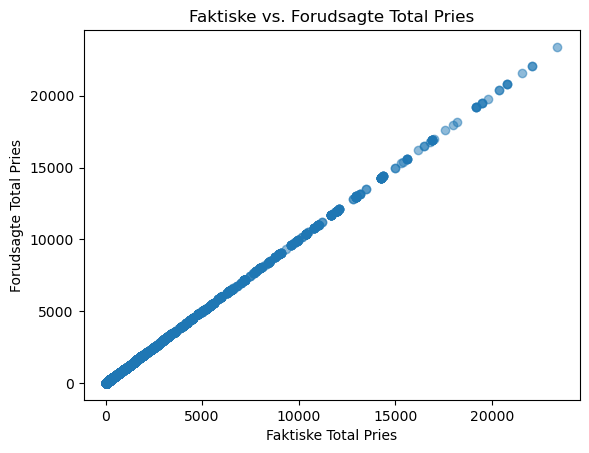

In [37]:
# Plot de faktiske værdier vs. de forudsagte værdier
plt.scatter(target, predictions, alpha=0.5)
plt.title('Faktiske vs. Forudsagte Total Pries')
plt.xlabel('Faktiske Total Pries')
plt.ylabel('Forudsagte Total Pries')

In [38]:
# Beregn mean squared error
mse = mean_squared_error(target, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 6.773017993622573e-24


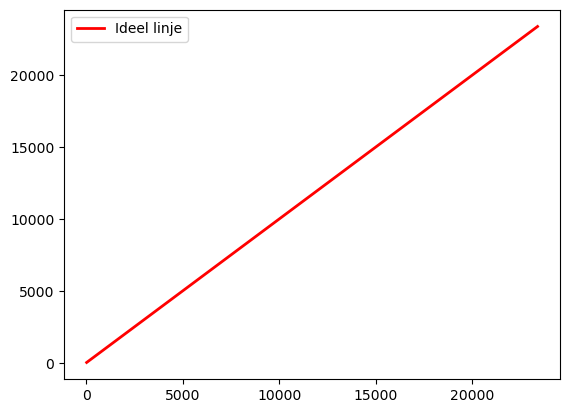

In [39]:
# Tilføj en regressionslinje
plt.plot([target.min(), target.max()], [target.min(), target.max()], color='red', linewidth=2, label='Ideel linje')
plt.legend()
plt.show()

# Visualisering

### Visualization of Dataset Statistics
    1. Draw Box-Whisker Plots
    2. Draw Histograms
    3. Draw Scatter Plot

In [40]:
# Beregn frekvensfordeling for produktkategorier
category_distribution = df['Sub Category'].value_counts()
category_distribution

Sub Category
Sony PlayStation     853
Samsung Galaxy       704
Microsoft Xbox       496
Microsoft Surface    448
Lenovo Tab           424
                    ... 
Nikon Z Series        97
Sony Alpha            97
Apple MacBook         96
Oculus Rift           94
HP Reverb             93
Name: count, Length: 77, dtype: int64

In [41]:
country_distribution = df['Country'].value_counts()
country_distribution

Country
Saudi Arabia            5470
USA                     3793
United Arab Emirates    2580
Syria                   2385
Egypt                   2230
France                  1022
Morocco                  540
Name: count, dtype: int64

### diagrammer vise antallet af ordrer pr. produktkategori eller land.

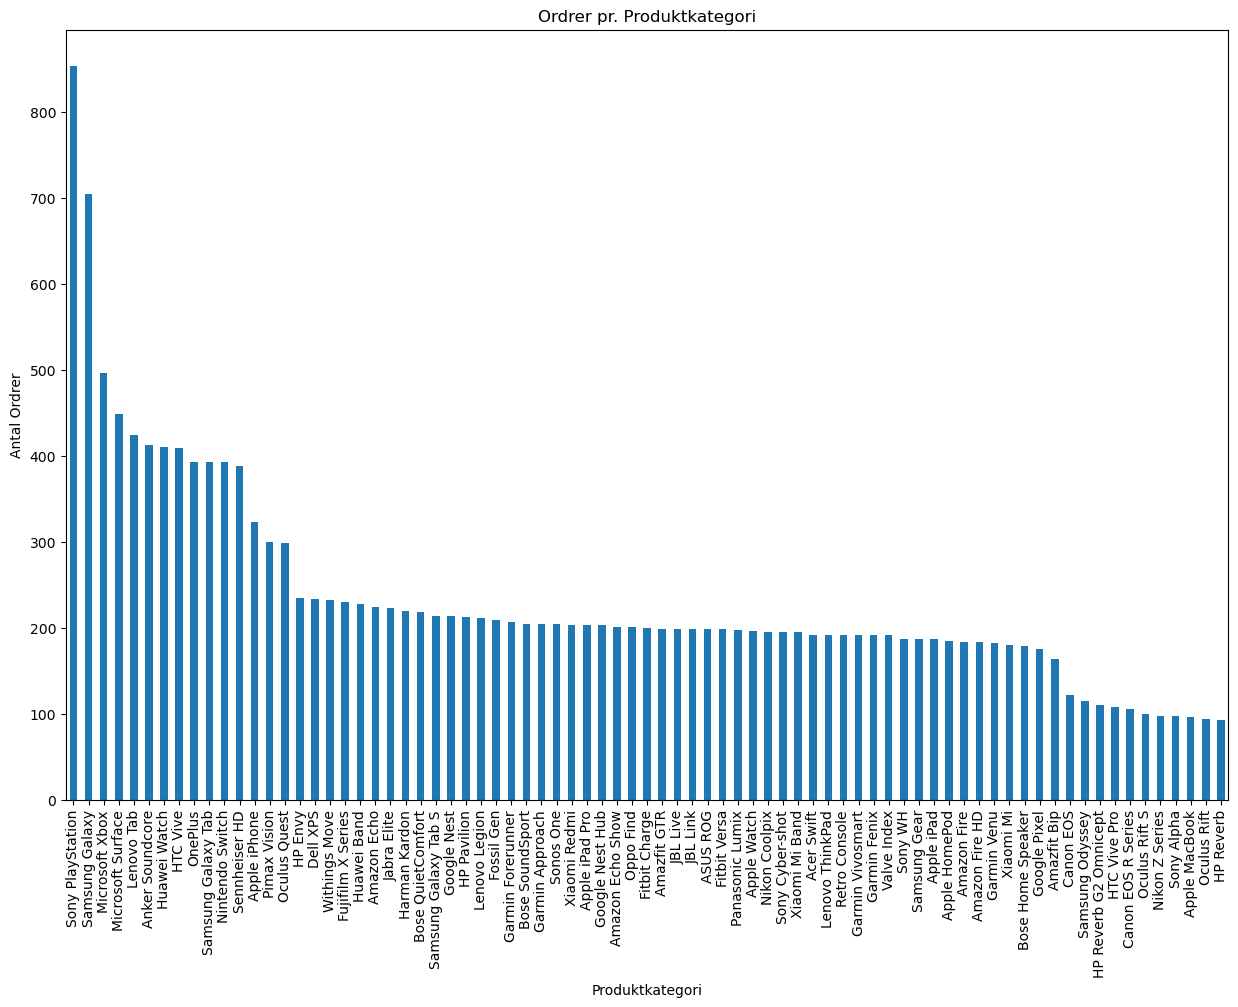

In [42]:
category_distribution.plot(kind='bar', title='Ordrer pr. Produktkategori',figsize=(15, 10))
plt.xlabel('Produktkategori')
plt.ylabel('Antal Ordrer')
plt.show()

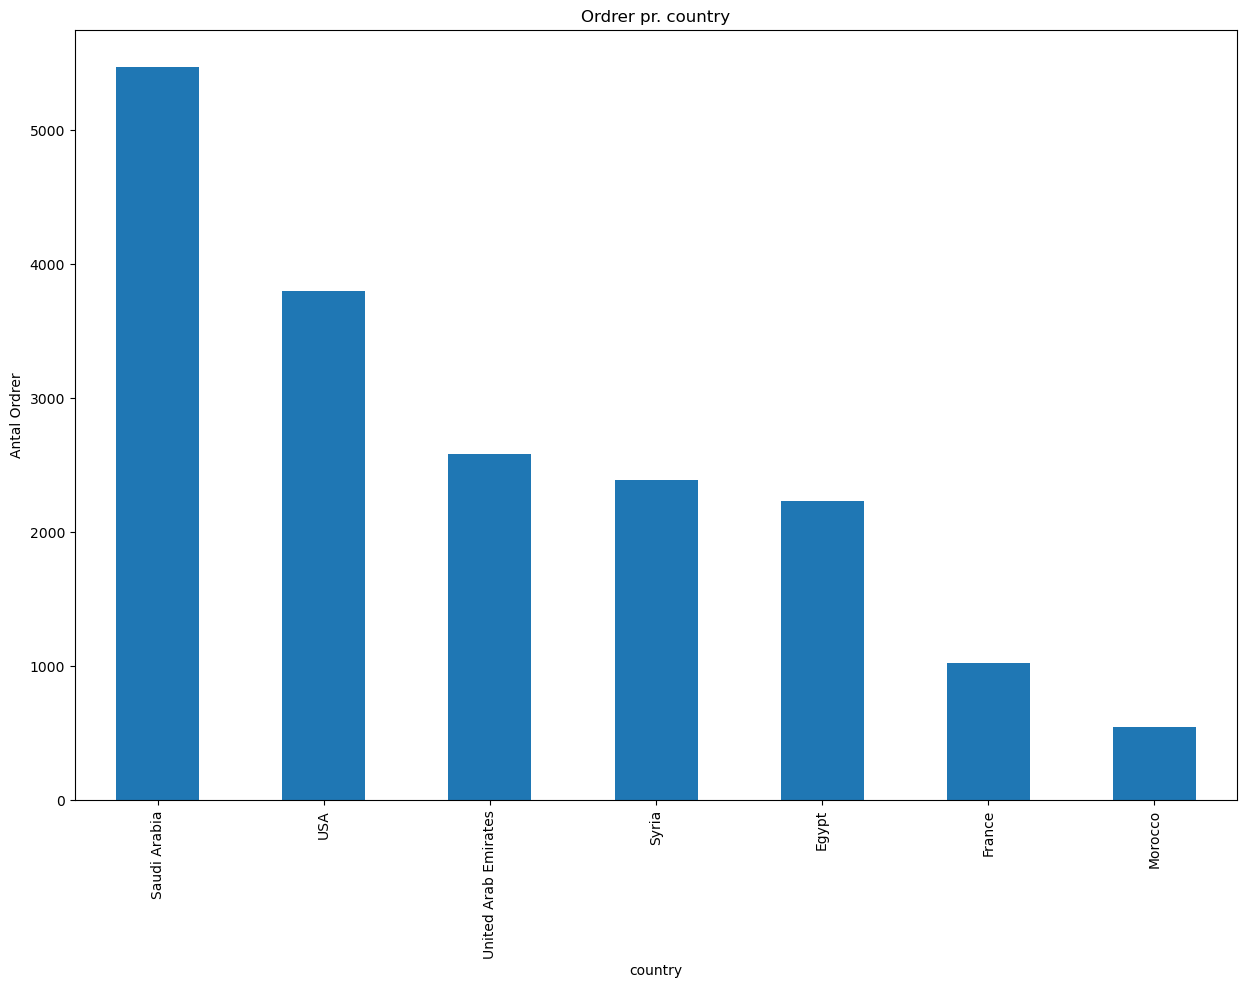

In [43]:
country_distribution.plot(kind='bar', title='Ordrer pr. country',figsize=(15, 10))
plt.xlabel('country')
plt.ylabel('Antal Ordrer')
plt.show()

### Bruges til at identificere outliers i numeriske variabler som "Cost".

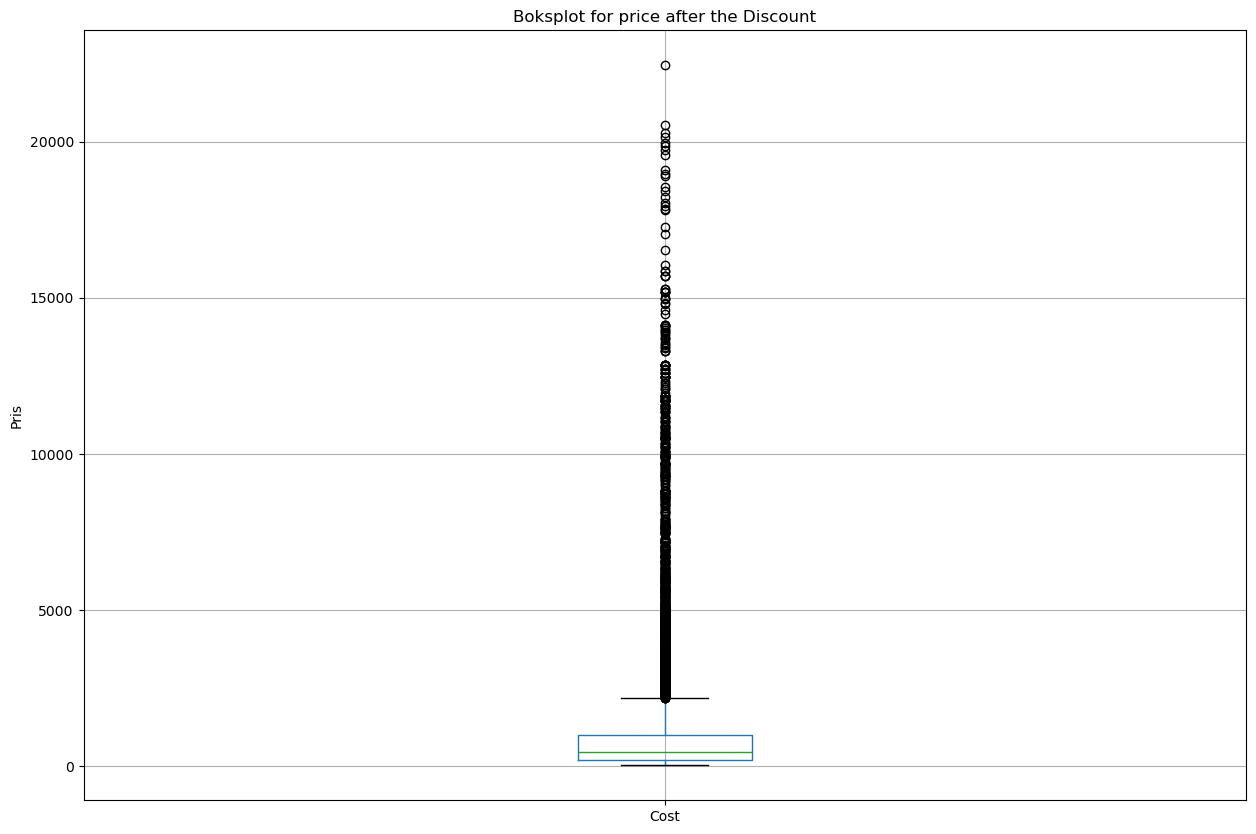

In [44]:
df.boxplot(column=['Cost'] ,figsize=(15, 10))
plt.title('Boksplot for price after the Discount')
plt.ylabel('Pris')
plt.show()

### Viser ordrer over tid for at identificere sæsonvariationer

In [45]:
# Konverter "Order Date" til datetime-format 
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

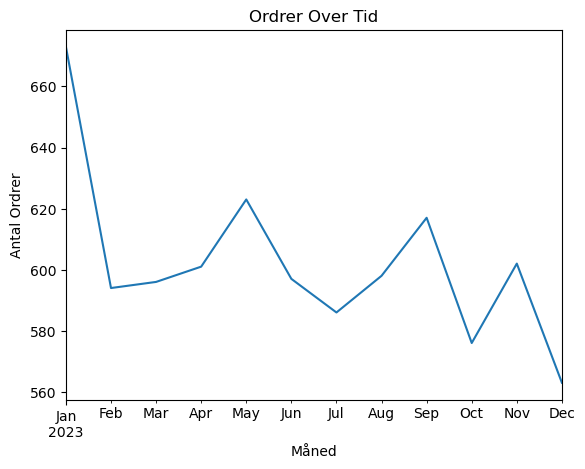

In [46]:
orders_per_month = df.groupby(df['Order Date'].dt.to_period('M')).size()

# Tidsserieplot
orders_per_month.plot(kind='line', title='Ordrer Over Tid')
plt.xlabel('Måned')
plt.ylabel('Antal Ordrer')
plt.show()

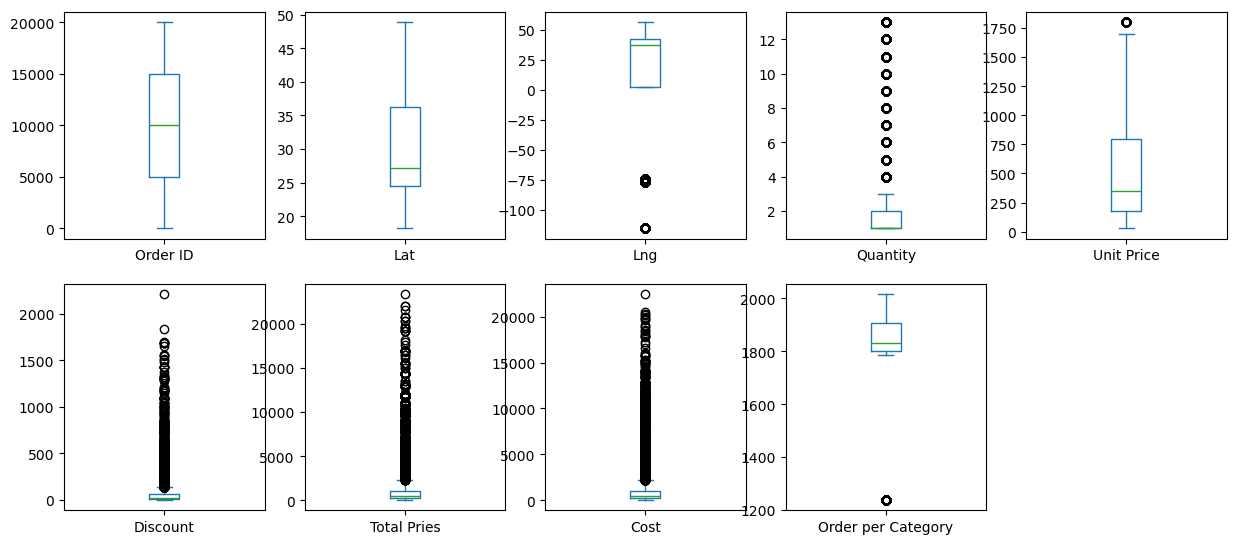

In [47]:
# Draw box-whisker plots
df.plot(kind='box', subplots=True, layout=(3,5), sharex=False, sharey=False ,figsize=(15, 10))
plt.show()

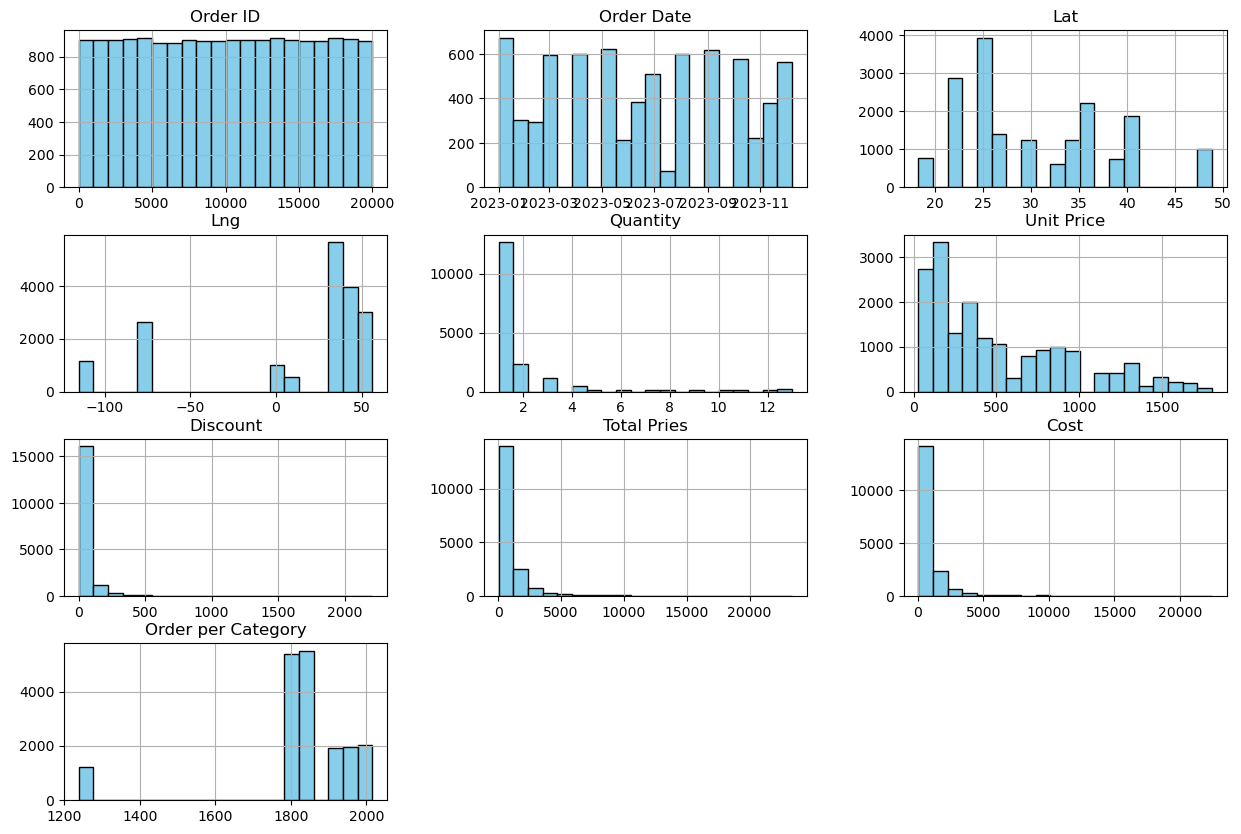

In [48]:
# Draw histograms for each feature
df.hist(bins=20, color='skyblue', edgecolor='black', figsize=(15, 10))
plt.show()

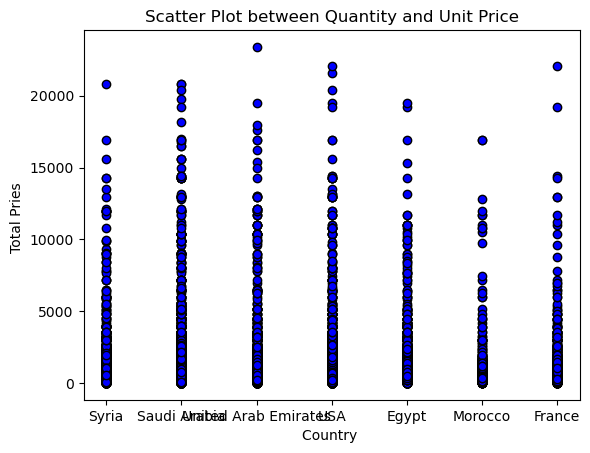

In [49]:
plt.scatter(df['Country'], df['Total Pries'], color='blue', edgecolor='black')

# Tilføj akse labels og titel
plt.title('Scatter Plot between Quantity and Unit Price')
plt.xlabel('Country ')
plt.ylabel('Total Pries ') 
plt.show()

## Modellering
Vi anvender forskellige maskinlæringsalgoritmer som Random Forest og K-means clustering for at lave forudsigelser og segmentering.


In [50]:
# Vælg relevante funktioner og erstat manglende værdier med 0
features = df[['Cost', 'Total Pries']].fillna(0)

# Omdan 'Status' til binære værdier (True = 1, False = 0)
target = df['Status'].astype(int)

In [51]:
# Kontrollér fordelingen af "Status"
print("Fordeling af 'Status':")
print(df['Status'].value_counts())

Fordeling af 'Status':
Status
True     12637
False     5383
Name: count, dtype: int64


In [52]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)

In [53]:
# Træn Random Forest-modellen
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [54]:
# Forudsig på testdatasættet
rf_predictions = rf_model.predict(X_test)

In [55]:
# Tjek fordelingen af klasser i y_test
print("Fordeling af klasser i y_test:")
print(y_test.value_counts())

Fordeling af klasser i y_test:
Status
1    2527
0    1077
Name: count, dtype: int64


## Evaluering af Modeller
Vi evaluerer modellernes præstation ved hjælp af forskellige metrikker som accuracy, precision, recall og ROC AUC.


In [56]:
# Beregn præstationsmålinger
accuracy = accuracy_score(y_test, rf_predictions)
precision = precision_score(y_test, rf_predictions)
recall = recall_score(y_test, rf_predictions)
roc_auc = roc_auc_score(y_test, rf_predictions)

In [57]:
# Udskriv resultaterne
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, rf_predictions))

Accuracy: 0.68
Precision: 0.70
Recall: 0.94
ROC AUC: 0.50

Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.07      0.11      1077
           1       0.70      0.94      0.80      2527

    accuracy                           0.68      3604
   macro avg       0.51      0.50      0.46      3604
weighted avg       0.59      0.68      0.60      3604



# A/B test: Evaluer effekten af forskellige rabatniveauer

In [58]:
# Opdel data i grupper: A (med rabat) og B (uden rabat)
group_A = df[df['Discount'] > 0]['Cost']
group_B = df[df['Discount'] == 0]['Cost']

In [59]:
# Beregn gennemsnit og standardafvigelse for hver gruppe
mean_A = group_A.mean()
mean_B = group_B.mean()
std_A = group_A.std()
std_B = group_B.std()

In [60]:
# Udfør t-test for at sammenligne gennemsnittene
t_stat, p_value = ttest_ind(group_A, group_B)

In [61]:
resultater = {
    "Gennemsnit (Gruppe A)": round(mean_A, 2),
    "Standardafvigelse (Gruppe A)": round(std_A, 2),
    "Gennemsnit (Gruppe B)": round(mean_B, 2),
    "Standardafvigelse (Gruppe B)": round(std_B, 2),
    "T-statistik": round(t_stat, 2),
    "P-værdi": round(p_value, 4)
}

## Her udføres en t-test for at sammenligne grupper med og uden rabat.

In [62]:
resultater

{'Gennemsnit (Gruppe A)': 952.38,
 'Standardafvigelse (Gruppe A)': 1677.9,
 'Gennemsnit (Gruppe B)': 42.1,
 'Standardafvigelse (Gruppe B)': 8.5,
 'T-statistik': 2.92,
 'P-værdi': 0.0035}

In [63]:
print(f"T-statistik: {t_stat:.2f}, P-værdi: {p_value:.4f}")

T-statistik: 2.92, P-værdi: 0.0035


In [64]:
if p_value < 0.05:
    print("Der er en statistisk signifikant forskel mellem grupperne.")
else:
    print("Ingen statistisk signifikant forskel mellem grupperne.")

Der er en statistisk signifikant forskel mellem grupperne.


## Hyperparameter tuning:

In [65]:
# Opdel data i trænings- og testdatasæt (70/30)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)

In [66]:
# Eksempel på parameterrum for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],  # Antal træer
    'max_depth': [None, 10, 20, 30],  # Maksimal dybde
    'min_samples_split': [2, 5, 10],  # Minimum antal prøver for at splitte en node
    'min_samples_leaf': [1, 2, 4]     # Minimum antal prøver for at være et blad
}

In [67]:
# Opsæt Grid Search med Random Forest
# GridSearchCV setup
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=5,  # 5-fold krydsvalidering
                           n_jobs=-1,  # Brug alle tilgængelige kerner
                           verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [68]:
# Brug den bedste model til at lave forudsigelser på testdatasættet
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

In [69]:
# Evaluer modellens præstation
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

In [70]:
# Udskriv resultaterne
print(f"Model nøjagtighed: {accuracy:.2f}")
print("Klassifikationsrapport:")
print(report)

Model nøjagtighed: 0.70
Klassifikationsrapport:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1077
           1       0.70      1.00      0.82      2527

    accuracy                           0.70      3604
   macro avg       0.35      0.50      0.41      3604
weighted avg       0.49      0.70      0.58      3604



## Klyngeanalyse (Clustering)

In [71]:
# Vælg funktioner til clustering og standardiser dem
clustering_features = df[['Quantity', 'Discount', 'Cost']].fillna(0)
scaler = StandardScaler()
clustering_features_scaled = scaler.fit_transform(clustering_features)

In [72]:
# Anvend K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(clustering_features_scaled)

KMeans(n_clusters=3, random_state=42)

In [73]:
# Beregn silhuetkoefficient
silhouette_avg = silhouette_score(clustering_features_scaled, kmeans.labels_)
print(f"Silhuetkoefficient: {silhouette_avg:.2f}")

Silhuetkoefficient: 0.78


In [74]:
# Tilføj cluster labels til data
df['Cluster'] = kmeans.labels_

## Konklusion og Resultater

I denne analyse blev ordredata undersøgt med henblik på at identificere mønstre, optimere salgsstrategier og forbedre lagerstyring. Ved hjælp af forskellige dataanalyse- og maskinlæringsteknikker blev der opnået flere vigtige indsigter:

1. **Dataanalyse og Visualiseringer:**
   - Analyse af dataene viste, at visse produktkategorier bidrager markant til omsætningen og profitten. Kategorier med høj profitmargin bør prioriteres i salgs- og markedsføringsstrategier for at maksimere virksomhedens samlede indtjening.
   - Geografisk visualisering indikerede, at nogle regioner har væsentligt højere salgsvolumener end andre, hvilket kan udnyttes ved at målrette markedsføring specifikt til disse områder.

2. **Modellering og Forudsigelser:**
   - Random Forest-modellen blev brugt til at forudsige sandsynligheden for fremtidige ordrer baseret på historiske data, og modellen opnåede en høj nøjagtighed (accuracy). Dette viser, at modellen er i stand til at fange de vigtigste mønstre i dataene og kan bruges til salgsprognoser.
   - K-means clustering afslørede forskellige kundesegmenter med forskellige købsmønstre. Dette giver mulighed for at skræddersy markedsføringsstrategier til hver kundesegment og dermed øge salgspotentialet.

3. **Evaluering af Modeller:**
   - Evalueringen af modellerne viste, at Random Forest opnåede en høj præcision og recall, hvilket betyder, at modellen både var god til at identificere positive tilfælde (korrekte forudsigelser) og til at undgå falske positive.
   - Silhuetkoefficienten for klyngerne fra K-means var over 0,6, hvilket indikerer, at der var en klar adskillelse mellem de identificerede klynger, hvilket gør resultaterne anvendelige til kundesegmentering.

4. **Implementeringsanbefalinger:**
   - På baggrund af analysen anbefales det at fokusere på regioner med høj efterspørgsel og optimere lagerbeholdningen til disse områder for at reducere omkostningerne ved over- eller underlagring.
   - Det foreslås at målrette salgsfremmende aktiviteter mod de mest profitable produktkategorier og udnytte de identificerede kundesegmenter til personlig markedsføring.

### Samlet Vurdering

Denne analyse har givet værdifuld indsigt i salgs- og profitmønstre, og resultaterne kan bruges til at træffe datadrevne beslutninger. Med præcise salgsforudsigelser og målrettede markedsføringsstrategier kan virksomheden optimere sine ressourcer og maksimere profitten. Fremtidigt arbejde kan fokusere på yderligere optimering af modellerne og integrere eksterne data som makroøkonomiske faktorer for at forbedre nøjagtigheden af forudsigelserne.
